In [185]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import pandas as pd
from scipy import stats
from scipy.stats import shapiro, ttest_rel, wilcoxon
import nelpy as nel
from reactivation import AssemblyReact, load_cell_metrics, load_epochs, load_ripples_events, load_SleepState_states, load_spikes, event_triggered_average_fast

## A015_day12

In [4]:
project_path='D:/Research Topic/tristan/step10_olivadata'

mice_name_A015_day12 = 'A015_day12'

assembly_react_A015_day12 = AssemblyReact(
    project_path=project_path,
    mice_name= mice_name_A015_day12,
    brainRegion="CA2-CA3",
    putativeCellType="pyr",
    z_mat_dt=0.025,
    )

In [5]:
assembly_react_A015_day12.load_data()
assembly_react_A015_day12.epoch_df
assembly_react_A015_day12.st
state_dict_A015_day12 = load_SleepState_states(project_path, mice_name_A015_day12)

wake_epoch = nel.EpochArray(
    state_dict_A015_day12["WAKEepisode"],
)

nrem_epochs = nel.EpochArray(
    state_dict_A015_day12["NREMepisode"],
)


C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support


In [6]:
assembly_react_A015_day12.epoch_df

,Cage_or_Maze,Start_Time,End_Time
0,rest_hab_pre,0.000000,2418.300000
1,habituation_arena,2418.300000,2649.483333
2,rest_hab_post,2649.483333,7713.083333
3,habituation_cage,7713.083333,7968.700000
4,rest_pre,7968.700000,10526.900000
5,2novel_exposure,10526.900000,10816.550000
6,exposure_reversed,10816.550000,11100.150000
7,rest_post2,11100.150000,14932.150000
8,1novel_exposure,14932.150000,15173.383333


In [7]:
len(assembly_react_A015_day12.cell_metrics)

20

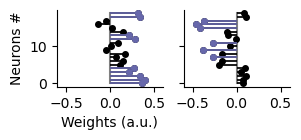

In [8]:
assembly_react_A015_day12.get_weights(epoch= assembly_react_A015_day12.epochs[3] & wake_epoch)
assembly_react_A015_day12.plot()
plt.show()

In [9]:
assembly_act_pre_A015_day12 = assembly_react_A015_day12.get_assembly_act(assembly_react_A015_day12.epochs[2] & nrem_epochs)
assembly_act_post_A015_day12 = assembly_react_A015_day12.get_assembly_act(assembly_react_A015_day12.epochs[4] & nrem_epochs) 

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.


In [10]:
act_pre_sleep_above_A015_day12 = np.where(assembly_act_pre_A015_day12.data[:] > 5, assembly_act_pre_A015_day12.data[:], 0)
act_post_sleep_above_A015_day12 = np.where(assembly_act_post_A015_day12.data[:] > 5, assembly_act_post_A015_day12.data[:], 0)

In [11]:
n = 2
Peak_reactivation_Joint_A015_day12 = []
for i in range(n):
    react = np.mean(act_post_sleep_above_A015_day12[i]) - np.mean(act_pre_sleep_above_A015_day12[i])
    Peak_reactivation_Joint_A015_day12.append(react)

Peak_reactivation_Joint_A015_day12 

[-0.002257146121396547, 0.009878549130041436]

## A013_day7

In [13]:
project_path='D:/Research Topic/tristan/step10_olivadata'

mice_name = 'A013_day7'

assembly_react_A013_day7 = AssemblyReact(
    project_path=project_path,
    mice_name= mice_name,
    brainRegion="CA2-CA3",
    putativeCellType="pyr",
    z_mat_dt=0.025,
    )

In [14]:
assembly_react_A013_day7.load_data()
assembly_react_A013_day7.epoch_df
assembly_react_A013_day7.st
assembly_react_A013_day7.cell_metrics
state_dict_A013_day7 = load_SleepState_states(project_path, mice_name)

wake_epoch = nel.EpochArray(
    state_dict_A013_day7["WAKEepisode"],
)

nrem_epochs = nel.EpochArray(
    state_dict_A013_day7["NREMepisode"],
)

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support


In [15]:
assembly_react_A013_day7.epoch_df

,Cage_or_Maze,Start_Time,End_Time
0,rest_hab_pre,0.000000,2367.133333
1,habituation_arena,2367.133333,2704.833333
2,rest_hab_post,2704.833333,4525.050000
3,habituation_cage,4525.050000,4803.033333
4,rest_pre,4803.033333,5598.166667
5,2novel_exposure,5598.166667,5954.583333
6,exposure_reversed,5954.583333,6203.716667
7,rest_post2,6203.716667,10313.616667
8,1novel_exposure,10313.616667,10692.500000
9,rest_post1,10692.500000,11848.083333


In [16]:
#assembly_react_A013_day7.cell_metrics

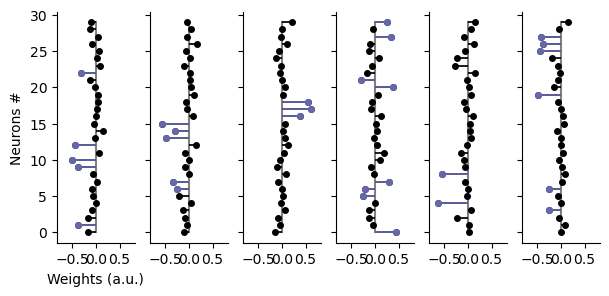

In [17]:
assembly_react_A013_day7.get_weights(epoch= assembly_react_A013_day7.epochs[3] & wake_epoch)
assembly_react_A013_day7.plot()
plt.show()

In [18]:
assembly_act_pre_A013_day7 = assembly_react_A013_day7.get_assembly_act(assembly_react_A013_day7.epochs[2] & nrem_epochs)
assembly_act_post_A013_day7 = assembly_react_A013_day7.get_assembly_act(assembly_react_A013_day7.epochs[4] & nrem_epochs)
act_pre_sleep_above_A013_day7 = np.where(assembly_act_pre_A013_day7.data[:] > 5, assembly_act_pre_A013_day7.data[:], 0)
act_post_sleep_above_A013_day7 = np.where(assembly_act_post_A013_day7.data[:] > 5, assembly_act_post_A013_day7.data[:], 0)

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.


In [19]:
num_ass = 6
Peak_reactivation_CA2_A013_day7 = []  
Peak_reactivation_JointCA2_3_A013_day7 = []

for i in range(num_ass):
    reactivation_value = np.mean(act_post_sleep_above_A013_day7[i]) - np.mean(act_pre_sleep_above_A013_day7[i])
    if i in {1,2,4}:
        Peak_reactivation_CA2_A013_day7.append(reactivation_value)
    else:
        Peak_reactivation_JointCA2_3_A013_day7.append(reactivation_value)


Peak_reactivation_JointCA2_3_A013_day7, Peak_reactivation_CA2_A013_day7

([0.005969251054651459, 0.01444897974302968, 0.005599985588469469],
 [-0.016247788901330357, -0.07299283495321054, -0.013591363509184856])

## A013_day15

In [21]:
project_path='D:/Research Topic/tristan/step10_olivadata'

mice_name = 'A013_day15'

assembly_react_A013_day15 = AssemblyReact(
    project_path=project_path,
    mice_name= mice_name,
    brainRegion="CA2",
    putativeCellType="pyr",
    z_mat_dt=0.025,
    )

In [22]:
assembly_react_A013_day15.load_data()
assembly_react_A013_day15.st
state_dict_A013_day15 = load_SleepState_states(project_path, mice_name)

wake_epoch = nel.EpochArray(
    state_dict_A013_day15["WAKEepisode"],
)

nrem_epochs = nel.EpochArray(
    state_dict_A013_day15["NREMepisode"],
)

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support


In [23]:
assembly_react_A013_day15.epoch_df

,Cage_or_Maze,Start_Time,End_Time
0,rest_hab_pre,0.000000,1858.566667
1,habituation_arena,1858.566667,2070.283333
2,rest_hab_post,2070.283333,3609.150000
3,habituation_cage,3609.150000,3907.066667
4,rest_pre,3907.066667,6102.083333
5,2novel_exposure,6102.083333,6344.233333
6,exposure_reversed,6344.233333,6572.450000
7,rest_post2,6572.450000,10804.400000
8,1novel_exposure,10804.400000,11057.933333
9,rest_post1,11057.933333,17857.533333


In [24]:
assembly_react_A013_day15.cell_metrics

,Type,Region,Modulation,CluID
0,pyr,CA2,positive,0
1,pyr,CA2,positive,1
2,pyr,CA2,positive,2
3,pyr,CA2,negative,3
4,pyr,CA2,positive,4
7,pyr,CA2,positive,7
8,pyr,CA2,positive,8
9,pyr,CA2,positive,9
10,pyr,CA2,positive,10
11,pyr,CA2,positive,11


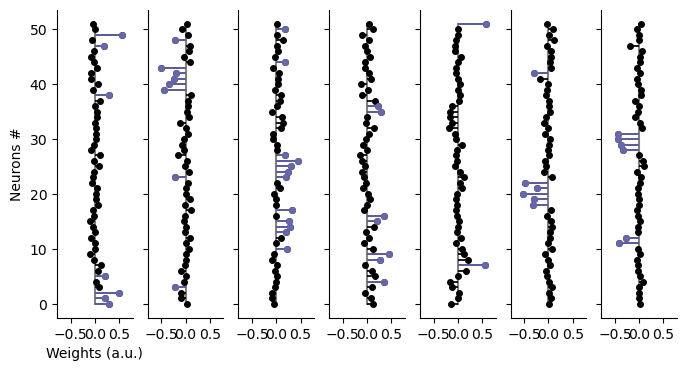

In [25]:
assembly_react_A013_day15.get_weights(epoch= assembly_react_A013_day15.epochs[3] & wake_epoch)
assembly_react_A013_day15.plot()
plt.show()

In [26]:
assembly_act_pre_A013_day15 = assembly_react_A013_day15.get_assembly_act(assembly_react_A013_day15.epochs[2] & nrem_epochs) 
assembly_act_post_A013_day15 = assembly_react_A013_day15.get_assembly_act(assembly_react_A013_day15.epochs[4] & nrem_epochs) 
act_pre_sleep_above_A013_day15 = np.where(assembly_act_pre_A013_day15.data[:] > 5, assembly_act_pre_A013_day15.data[:], 0)
act_post_sleep_above_A013_day15 = np.where(assembly_act_post_A013_day15.data[:] > 5, assembly_act_post_A013_day15.data[:], 0)

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.


In [27]:
num_ass = 7
Peak_reactivation_CA2_A013_day15 = []  

for i in range(num_ass):
    reactivation_value = np.mean(act_post_sleep_above_A013_day15[i]) - np.mean(act_pre_sleep_above_A013_day15[i])
    Peak_reactivation_CA2_A013_day15.append(reactivation_value)  # Append the value directly

Peak_reactivation_CA2_A013_day15

[0.018831521731982992,
 -0.01205157389389025,
 -0.07984954409667563,
 -0.05134066862906164,
 -0.06128419246829414,
 -0.1426620926138686,
 -0.11052697387789445]

## A013_day13

In [29]:
project_path='D:/Research Topic/tristan/step10_olivadata'

mice_name = 'A013_day13'

assembly_react_A013_day13 = AssemblyReact(
    project_path=project_path,
    mice_name= mice_name,
    brainRegion="CA2",
    putativeCellType="pyr",
    z_mat_dt=0.025,
    )

In [30]:
assembly_react_A013_day13.load_data()
assembly_react_A013_day13.st
state_dict_A013_day13 = load_SleepState_states(project_path, mice_name)

wake_epoch = nel.EpochArray(
    state_dict_A013_day13["WAKEepisode"],
)

nrem_epochs = nel.EpochArray(
    state_dict_A013_day13["NREMepisode"],
)

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support


In [31]:
assembly_react_A013_day13.epoch_df

,Cage_or_Maze,Start_Time,End_Time
0,rest_hab_pre,0.000000,2333.183333
1,habituation_arena,2333.183333,2560.416667
2,rest_hab_post,2560.416667,4405.633333
3,habituation_cage,4405.633333,4557.216667
4,rest_pre,4557.216667,8314.366667
5,2novel_exposure,8314.366667,8569.333333
6,exposure_reversed,8569.333333,8820.266667
7,rest_post2,8820.266667,11501.800000
8,1novel_exposure,11501.800000,11827.583333


In [32]:
assembly_react_A013_day13.cell_metrics

,Type,Region,Modulation,CluID
0,pyr,CA2,negative,0
1,pyr,CA2,positive,1
2,pyr,CA2,positive,2
3,pyr,CA2,positive,3
4,pyr,CA2,positive,4
5,pyr,CA2,positive,5
6,pyr,CA2,positive,6
7,pyr,CA2,positive,7
8,pyr,CA2,positive,8
9,pyr,CA2,positive,9


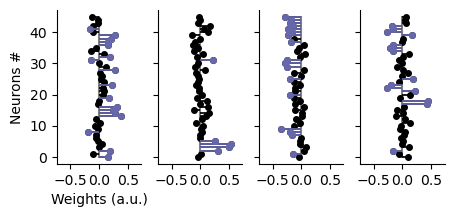

In [33]:
assembly_react_A013_day13.get_weights(epoch= assembly_react_A013_day13.epochs[3] & wake_epoch)
assembly_react_A013_day13.plot()
plt.show()

In [34]:
assembly_act_pre_A013_day13 = assembly_react_A013_day13.get_assembly_act(assembly_react_A013_day13.epochs[2] & nrem_epochs) 
assembly_act_post_A013_day13 = assembly_react_A013_day13.get_assembly_act(assembly_react_A013_day13.epochs[4] & nrem_epochs) 
act_pre_sleep_above_A013_day13 = np.where(assembly_act_pre_A013_day13.data[:] > 5, assembly_act_pre_A013_day13.data[:], 0)
act_post_sleep_above_A013_day13 = np.where(assembly_act_post_A013_day13.data[:] > 5, assembly_act_post_A013_day13.data[:], 0)

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.


In [35]:
num_ass = 4
Peak_reactivation_CA2_A013_day13 = []  

for i in range(num_ass):
    reactivation_value = np.mean(act_post_sleep_above_A013_day13[i]) - np.mean(act_pre_sleep_above_A013_day13[i])
    Peak_reactivation_CA2_A013_day13.append(reactivation_value)  
Peak_reactivation_CA2_A013_day13

[0.004391505567274523,
 0.016711809115171006,
 0.09440502495832531,
 -0.01685227831902164]

## A012_day15

In [37]:
project_path='D:/Research Topic/tristan/step10_olivadata'

mice_name = 'A012_day15'

assembly_react_A012_day15 = AssemblyReact(
    project_path=project_path,
    mice_name= mice_name,
    brainRegion="CA2-CA1",
    putativeCellType="pyr",
    z_mat_dt=0.025,
    )

In [38]:
assembly_react_A012_day15.load_data()
assembly_react_A012_day15.st
assembly_react_A012_day15.epoch_df

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support


,Cage_or_Maze,Start_Time,End_Time
0,rest_hab_pre,0.000000,1979.283333
1,habituation_arena,1979.283333,2200.566667
2,rest_hab_post,2200.566667,4082.816667
3,habituation_cage,4082.816667,4319.833333
4,rest_pre,4319.833333,6962.466667
5,2novel_exposure,6962.466667,7207.216667
6,exposure_reversed,7207.216667,7509.900000
7,rest_post2,7509.900000,12106.666667
8,1novel_exposure,12106.666667,12384.666667
9,rest_post1,12384.666667,18832.900000


In [39]:
assembly_react_A012_day15.cell_metrics

,Type,Region,Modulation,CluID
1,pyr,CA2,negative,1
9,pyr,CA2,positive,9
10,pyr,CA2,negative,10
12,pyr,CA2,positive,12
14,pyr,CA2,positive,14
...,...,...,...,...
82,pyr,CA1,positive,82
85,pyr,CA1,positive,85
86,pyr,CA1,positive,86
87,pyr,CA1,positive,87


In [40]:
state_dict_A012_day15 = load_SleepState_states(project_path, mice_name)

wake_epoch = nel.EpochArray(
    state_dict_A012_day15["WAKEepisode"],
)

nrem_epochs = nel.EpochArray(
    state_dict_A012_day15["NREMepisode"],
)

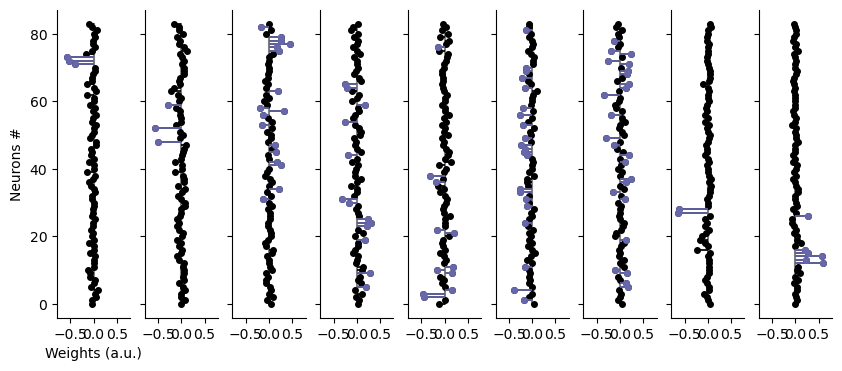

In [41]:
assembly_react_A012_day15.get_weights(epoch= assembly_react_A012_day15.epochs[3] & wake_epoch)
assembly_react_A012_day15.plot()
plt.show()

In [42]:
assembly_act_pre_A012_day15 = assembly_react_A012_day15.get_assembly_act(assembly_react_A012_day15.epochs[2] & nrem_epochs) 
assembly_act_post_A012_day15 = assembly_react_A012_day15.get_assembly_act(assembly_react_A012_day15.epochs[4] & nrem_epochs) 
act_pre_sleep_above_A012_day15 = np.where(assembly_act_pre_A012_day15.data[:] > 5, assembly_act_pre_A012_day15.data[:], 0)
act_post_sleep_above_A012_day15 = np.where(assembly_act_post_A012_day15.data[:] > 5, assembly_act_post_A012_day15.data[:], 0)

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.


In [43]:
num_ass = 9
Peak_reactivation_CA2_A012_day15 = []  
Peak_reactivation_CA1_A012_day15 = []
Peak_reactivation_JointCA1_CA2_A012_day15 = []

for i in range(num_ass):
    reactivation_value = np.mean(act_post_sleep_above_A012_day15[i]) - np.mean(act_pre_sleep_above_A012_day15[i])
    if i in {7,8}:
        Peak_reactivation_CA2_A012_day15.append(reactivation_value)
    elif i in {0,1}:
        Peak_reactivation_CA1_A012_day15.append(reactivation_value)
    else:
        Peak_reactivation_JointCA1_CA2_A012_day15.append(reactivation_value)

Peak_reactivation_CA2_A012_day15, Peak_reactivation_CA1_A012_day15, Peak_reactivation_JointCA1_CA2_A012_day15


([0.03530627918409041, -0.050793939049199294],
 [-0.25289709202570615, -0.017631706866241756],
 [-0.02104809309479247,
  0.0035509362491444457,
  -0.02134957035798231,
  0.007056585723846154,
  0.0011182679348359231])

## A010_day26

In [45]:
project_path='D:/Research Topic/tristan/step10_olivadata'

mice_name = 'A010_day26'

assembly_react_A010_day26 = AssemblyReact(
    project_path=project_path,
    mice_name= mice_name,
    brainRegion="CA2-CA1",
    putativeCellType="pyr",
    z_mat_dt=0.025,
    )

In [46]:
assembly_react_A010_day26.load_data()
assembly_react_A010_day26.epoch_df
assembly_react_A010_day26.st

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support


<SpikeTrainArray at 0x1e2e6f0fcd0: 26 units (10 segments)> at 30000 Hz

In [47]:
state_dict_A010_day26 = load_SleepState_states(project_path, mice_name)

wake_epoch = nel.EpochArray(
    state_dict_A010_day26["WAKEepisode"],
)

nrem_epochs = nel.EpochArray(
    state_dict_A010_day26["NREMepisode"],
)

In [48]:
assembly_react_A010_day26.epoch_df

,Cage_or_Maze,Start_Time,End_Time
0,rest_hab_pre,0.000000,3748.850000
1,habituation_arena,3748.850000,4124.516667
2,rest_hab_post,4124.516667,7859.066667
3,habituation_cage,7859.066667,8177.133333
4,rest_pre,8177.133333,12620.850000
5,2novel_exposure,12620.850000,12920.050000
6,exposure_reversed,12920.050000,13236.200000
7,rest_post2,13236.200000,15553.100000
8,1novel_exposure,15553.100000,15817.400000
9,rest_post1,15817.400000,18365.050000


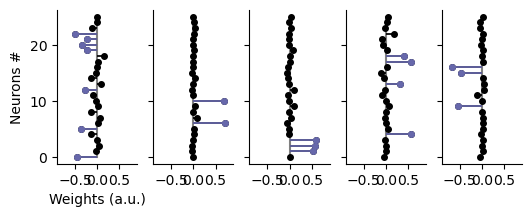

In [49]:
assembly_react_A010_day26.get_weights(epoch= assembly_react_A010_day26.epochs[3] & wake_epoch)
assembly_react_A010_day26.plot()
plt.show()

In [50]:
assembly_act_pre_A010_day26 = assembly_react_A010_day26.get_assembly_act(assembly_react_A010_day26.epochs[2] & nrem_epochs) 
assembly_act_post_A010_day26 = assembly_react_A010_day26.get_assembly_act(assembly_react_A010_day26.epochs[4] & nrem_epochs) 
act_pre_sleep_above_A010_day26 = np.where(assembly_act_pre_A010_day26.data[:] > 5, assembly_act_pre_A010_day26.data[:], 0)
act_post_sleep_above_A010_day26 = np.where(assembly_act_post_A010_day26.data[:] > 5, assembly_act_post_A010_day26.data[:], 0)

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.


In [51]:
num_ass = 5
Peak_reactivation_CA2_A010_day26 = []  

for i in range(num_ass):
    reactivation_value = np.mean(act_post_sleep_above_A010_day26[i]) - np.mean(act_pre_sleep_above_A010_day26[i])
    Peak_reactivation_CA2_A010_day26.append(reactivation_value)  
Peak_reactivation_CA2_A010_day26

[0.007497380019782646,
 -0.011601187651387679,
 -0.012947264760877708,
 -0.024785107981889237,
 0.04601528688524381]

## A010_day14

In [53]:
project_path='D:/Research Topic/tristan/step10_olivadata'

mice_name = 'A010_day14'

assembly_react_A010_day14 = AssemblyReact(
    project_path=project_path,
    mice_name= mice_name,
    brainRegion="CA2-CA1",
    putativeCellType="pyr",
    z_mat_dt=0.025,
    )

In [54]:
assembly_react_A010_day14.load_data()
assembly_react_A010_day14.st
state_dict_A010_day14 = load_SleepState_states(project_path, mice_name)

wake_epoch = nel.EpochArray(
    state_dict_A010_day14["WAKEepisode"],
)

nrem_epochs = nel.EpochArray(
    state_dict_A010_day14["NREMepisode"],
)

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support


In [55]:
assembly_react_A010_day14.cell_metrics

,Type,Region,Modulation,CluID
0,pyr,CA2,positive,0
1,pyr,CA2,positive,1
2,pyr,CA2,positive,2
3,pyr,CA2,positive,3
4,pyr,CA2,positive,4
5,pyr,CA2,positive,5
6,pyr,CA2,positive,6
8,pyr,CA2,positive,8
11,pyr,CA2,positive,11
13,pyr,CA2,positive,13


In [56]:
assembly_react_A010_day14.epoch_df

,Cage_or_Maze,Start_Time,End_Time
0,rest_hab_pre,0.000000,6182.583333
1,habituation_arena,6182.583333,6847.983333
2,rest_hab_post,6847.983333,9046.750000
3,habituation_cage,9046.750000,9647.350000
4,rest_pre,9647.350000,16040.783333
5,2novel_exposure,16040.783333,16652.183333
6,exposure_reversed,16652.183333,17231.616667
7,rest_post2,17231.616667,22221.733333
8,1novel_exposure,22221.733333,22870.133333
9,rest_post1,22870.133333,26933.100000


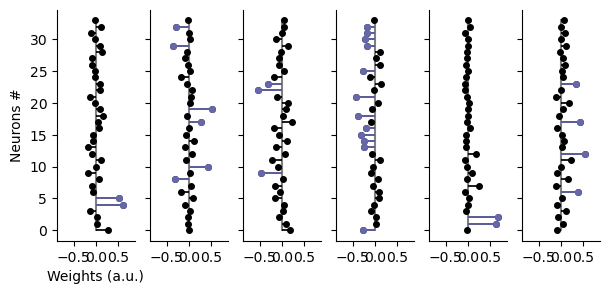

In [57]:
assembly_react_A010_day14.get_weights(epoch= assembly_react_A010_day14.epochs[3] & wake_epoch)
assembly_react_A010_day14.plot()
plt.show()

In [58]:
assembly_act_pre_A010_day14 = assembly_react_A010_day14.get_assembly_act(assembly_react_A010_day14.epochs[2] & nrem_epochs) 
assembly_act_post_A010_day14 = assembly_react_A010_day14.get_assembly_act(assembly_react_A010_day14.epochs[4] & nrem_epochs) 
act_pre_sleep_above_A010_day14 = np.where(assembly_act_pre_A010_day14.data[:] > 5, assembly_act_pre_A010_day14.data[:], 0)
act_post_sleep_above_A010_day14 = np.where(assembly_act_post_A010_day14.data[:] > 5, assembly_act_post_A010_day14.data[:], 0)

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.


In [59]:
num_ass = 6
Peak_reactivation_CA2_A010_day14 = [] 
Peak_reactivation_JointCA1_CA2_A010_day14 = []

for i in range(num_ass):
    reactivation_value = np.mean(act_post_sleep_above_A010_day14[i]) - np.mean(act_pre_sleep_above_A010_day14[i])
    if i in {1,3}:
        Peak_reactivation_JointCA1_CA2_A010_day14.append(reactivation_value)
    else:
        Peak_reactivation_CA2_A010_day14.append(reactivation_value)

Peak_reactivation_CA2_A010_day14, Peak_reactivation_JointCA1_CA2_A010_day14

([0.10128688449299018,
  0.018063764117712267,
  -0.14763831616707862,
  0.17393001079519538],
 [0.014149882202541916, 0.003966537333645825])

## PeakReactivation Object

In [61]:
CA2_react = [*Peak_reactivation_CA2_A010_day14, *Peak_reactivation_CA2_A010_day26, *Peak_reactivation_CA2_A012_day15,
             *Peak_reactivation_CA2_A013_day13,*Peak_reactivation_CA2_A013_day15, *Peak_reactivation_CA2_A013_day7]
#CA3_react = [Peak_reactivation_CA3_A015_day12]
CA2_CA3_react = [*Peak_reactivation_JointCA2_3_A013_day7, *Peak_reactivation_Joint_A015_day12]
CA1_react = [*Peak_reactivation_CA1_A012_day15]
CA1_CA2_react = [*Peak_reactivation_JointCA1_CA2_A012_day15]

In [62]:
df = dict(CA2 = CA2_react,
      CA2_CA3 = CA2_CA3_react,
      #CA1 = CA1_react,
CA1_CA2 = CA1_CA2_react)
Peak_Reactivation_Strength = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in df.items() ]))

In [63]:
Peak_Reactivation_Strength

,CA2,CA2_CA3,CA1_CA2
0,0.101287,0.005969,-0.021048
1,0.018064,0.014449,0.003551
2,-0.147638,0.005600,-0.021350
3,0.173930,-0.002257,0.007057
4,0.007497,0.009879,0.001118
5,-0.011601,NaN,NaN
6,-0.012947,NaN,NaN
7,-0.024785,NaN,NaN
8,0.046015,NaN,NaN
9,0.035306,NaN,NaN


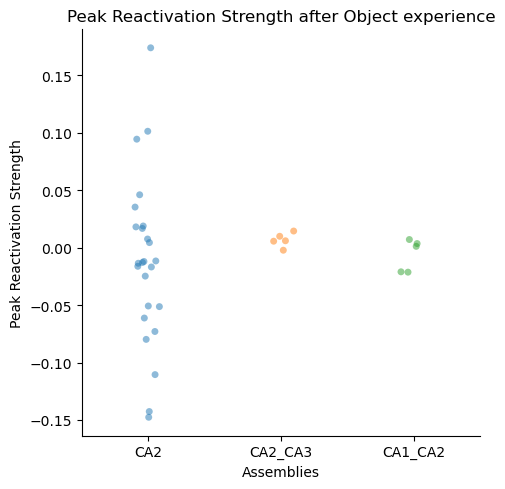

In [64]:
sns.catplot(data=Peak_Reactivation_Strength, jitter=True,  alpha=0.5)

# Overlay with the means using pointplot
#sns.pointplot(data=Peak_Reactivation_Strength, ci=None, markers="D",  scale=1.5)

# Customize the plot for better appearance
plt.title("Peak Reactivation Strength after Object experience")
plt.xlabel("Assemblies")
plt.ylabel("Peak Reactivation Strength")
plt.xticks()
plt.grid(False)
plt.tight_layout()

plt.show()

## Peak react social and object

In [171]:
df_social = {'CA2': [-0.22203102450820136,
  -0.14960430410288786,
  0.12050320077134652,
  0.007500511133012144,
  -0.014878004779528442,
  -0.025738146652989013,
  0.01786121750637998,
  0.0032458630669167307,
  0.08516441269399289,
  0.2148033053121073,
  0.011188330857946904,
  -0.030670316433271283,
  -0.017844757512055526,
  0.012757157711270367,
  -0.0016994955065782746,
  0.05521261094038782,
  -0.01147146157572912,
  0.01625602382998448,
  0.05127059085819308,
  0.09211077420314634,
  0.054600888598882735,
  -0.03775112004496206,
  0.061623548121877536, np.NaN, np.NaN],
 'CA2_CA3': [0.10163233861758703,
  -0.008048955806198688,
  0.05312523477649539,
  0.021839844214255555],
 'CA1_CA2': [0.002749882811473592,
  0.06699623739374119,
  0.04926273765172281,
  -0.031261623137172456,
  0.07405022777868785]}

In [175]:
Peak_Reactivation_Strength_Social = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in df_social.items() ]))
Peak_Reactivation_Strength_Social

,CA2,CA2_CA3,CA1_CA2
0,-0.222031,0.101632,0.002750
1,-0.149604,-0.008049,0.066996
2,0.120503,0.053125,0.049263
3,0.007501,0.021840,-0.031262
4,-0.014878,NaN,0.074050
5,-0.025738,NaN,NaN
6,0.017861,NaN,NaN
7,0.003246,NaN,NaN
8,0.085164,NaN,NaN
9,0.214803,NaN,NaN


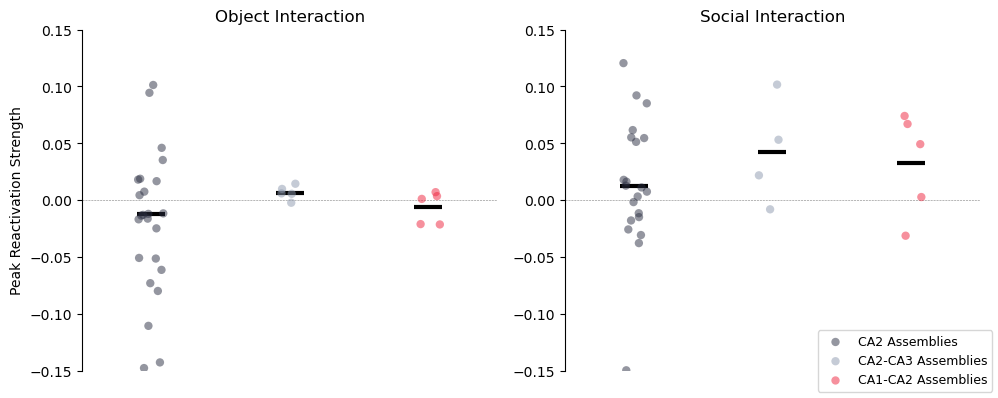

In [128]:
plt.style.use('seaborn-v0_8-pastel')
fig, axs = plt.subplots(1, 2, figsize=(10, 4))


colors = ["#2B2F42", "#8D99AE", "#EF233C"]

# Calculate the y-axis limits based on the combined range of both datasets
y_min = -0.15
y_max = 0.15

# Object Interaction Plot
sns.stripplot(
    data=Peak_Reactivation_Strength,
    jitter=True, alpha=0.5, ax=axs[0], palette=colors, size=6
)
sns.pointplot(
    data=Peak_Reactivation_Strength,
    linestyles="none", markers="_",  errorbar=None, markersize=20, markeredgewidth=3, ax=axs[0], color="black"
)
axs[0].set_title("Object Interaction")
axs[0].set_xlabel("")  # Remove x-axis label
axs[0].set_xticks([])  # Remove x-axis ticks
axs[0].set_ylabel("Peak Reactivation Strength")
axs[0].set_ylim(y_min, y_max)  # Set consistent y-axis limits

# Social Interaction Plot
sns.stripplot(
    data=Peak_Reactivation_Strength_Social,
    jitter=True, alpha=0.5, ax=axs[1], palette=colors, size=6
)
sns.pointplot(
    data=Peak_Reactivation_Strength_Social,
    linestyles="none", markers="_", ax=axs[1], errorbar=None, markersize=20, markeredgewidth=3, color="black"
)
axs[1].set_title("Social Interaction")
axs[1].set_xlabel("")  # Remove x-axis label
axs[1].set_xticks([])  # Remove x-axis ticks
axs[1].set_ylim(y_min, y_max)  # Set consistent y-axis limits

for ax in axs:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('none')
    ax.axhline(0, linestyle='--', color='grey', linewidth=0.4)

# Add legend with specific labels
fig.legend(['CA2 Assemblies', 'CA2-CA3 Assemblies', 'CA1-CA2 Assemblies'],
           loc='outside right lower', fontsize=9)

plt.tight_layout()
plt.show()


In [135]:
Peak_Reactivation_Strength_Social.head()

,CA2,CA2_CA3,CA1_CA2
0,-0.222031,0.101632,0.002750
1,-0.149604,-0.008049,0.066996
2,0.120503,0.053125,0.049263
3,0.007501,0.021840,-0.031262
4,-0.014878,NaN,0.074050


In [133]:
Peak_Reactivation_Strength.head()

,CA2,CA2_CA3,CA1_CA2
0,0.101287,0.005969,-0.021048
1,0.018064,0.014449,0.003551
2,-0.147638,0.005600,-0.021350
3,0.173930,-0.002257,0.007057
4,0.007497,0.009879,0.001118


In [139]:
stat_socialCA2, p_socialCA2 = shapiro(Peak_Reactivation_Strength_Social['CA2'])
stat_objectCA2, p_objectCA2 = shapiro(Peak_Reactivation_Strength['CA2'])

In [141]:
p_objectCA2

0.46705426573988335

In [187]:
stat, p = ttest_rel(Peak_Reactivation_Strength_Social['CA2'], Peak_Reactivation_Strength_Social['CA2_CA3'], nan_policy= 'omit')

In [189]:
p, stat

(0.3130143664079459, -1.209728373185023)

In [193]:
stat, p = ttest_rel(Peak_Reactivation_Strength['CA2'], Peak_Reactivation_Strength['CA2_CA3'], nan_policy= 'omit')
stat, p

(0.4335721967339432, 0.6869577087194747)

In [195]:
stat, p = ttest_rel(Peak_Reactivation_Strength['CA2'], Peak_Reactivation_Strength_Social['CA2'], nan_policy= 'omit')

In [197]:
stat, p

(-0.832999038673856, 0.4137975365862667)

In [199]:
stat, p = ttest_rel(Peak_Reactivation_Strength['CA2_CA3'], Peak_Reactivation_Strength_Social['CA2_CA3'], nan_policy= 'omit')
stat, p

(-1.472011583734769, 0.2374105464544841)

In [201]:
stat, p = ttest_rel(Peak_Reactivation_Strength['CA1_CA2'], Peak_Reactivation_Strength_Social['CA1_CA2'], nan_policy= 'omit')
stat, p

(-1.8190485561791094, 0.1430351127612143)